In [20]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

from HJK.dynamics.systems import simple2D, rk1, rk4

In [21]:
plt.rcParams['figure.figsize'] = [9, 6]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Integrate using `scipy odeint`

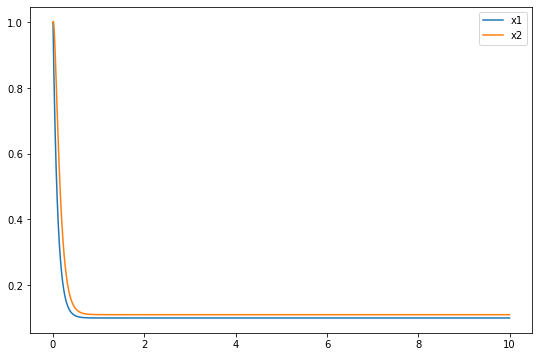

In [22]:
def u_fun():
    return [1.0, 1.0] # no control

# Generate measurement data
dt = .0001

t_train = np.arange(0, 10, dt)
x0_train = [1.0, 1.0]
t_train_span = (t_train[0], t_train[-1])

u =u_fun()

x_train = odeint(simple2D, x0_train, t_train, args=(u, -10.0, -10.0))

plt.plot(t_train, x_train)
plt.legend(["x1", "x2"])

# Integrate using `scipy solve_ivp (default method is RK45)`

In [23]:
def u_fun():
    return [1.0, 1.0] # no control
u = u_fun()

# Generate measurement data
dt = .0001


# Initialize integrator keywords for solve_ivp to replicate the odeint defaults
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'RK45'
integrator_keywords['atol'] = 1e-12


t_train = np.arange(0, 10, dt)
x0_train = [1, 1]
t_train_span = (t_train[0], t_train[-1])
x_train = solve_ivp(simple2D, t_train_span, x0_train, 
                    t_eval=t_train, **integrator_keywords).y.T

plt.plot(t_train, x_train)
plt.legend(["x1", "x2"])

TypeError: 'float' object is not subscriptable

# Integrate using Runge Kutta order 1

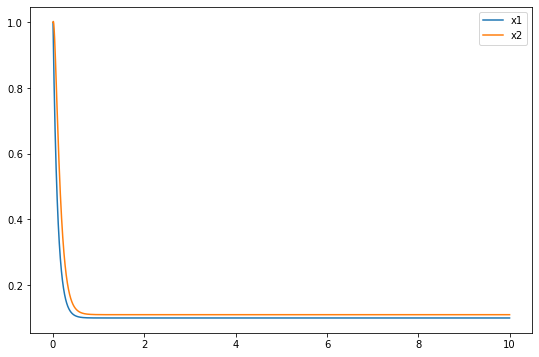

In [24]:
def u_fun():
    return [1.0, 1.0] # no control

# Generate measurement data
dt = .0001

t_train = np.arange(0, 10, dt)
x0_train = [1.0, 1.0]
t_train_span = (t_train[0], t_train[-1])

u =u_fun()

x_train = rk1(simple2D, x0_train, t_train, args=(u, -10.0, -10.0))

plt.plot(t_train, x_train)
plt.legend(["x1", "x2"])

# Integrate using Runge Kutta order 4

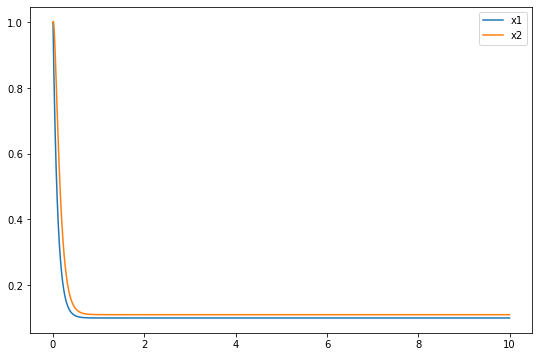

In [ ]:
def u_fun():
    return [1.0, 1.0] # no control

# Generate measurement data
dt = .0001

t_train = np.arange(0, 10, dt)
x0_train = [1.0, 1.0]
t_train_span = (t_train[0], t_train[-1])

u =u_fun()

x_train = rk4(simple2D, x0_train, t_train, args=(u, -10.0, -10.0))

plt.plot(t_train, x_train)
plt.legend(["x1", "x2"])

# Compare accuracy

In [ ]:
def accuracy(dt=101):
    t = np.linspace(0, 10, dt)
    for method, m in zip(methods, markers):
        sol = method(simple2D, x0_train, t, args=(u, -10.0, -10.0))
        plt.plot(t, sol[:, 0], label=method.__name__, marker=m)
    plt.legend(loc='best')
    plt.title("Comparison of different ODE integration methods for $n={}$ points".format(dt))
    plt.xlabel("$t = [0, 10]$")
    plt.show()

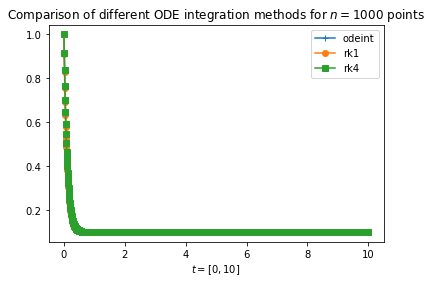

In [ ]:
methods = [odeint, rk1, rk4]
markers = ['+', 'o', 's']

dt = 1000 # for n_time>1000, accuracy is pretty much the same for all methods
accuracy(dt)

# Compare speed

In [ ]:
def speed(n=101):
    t = np.linspace(0, 10, dt)
    for method in methods:
        print("Time of solving this ODE for {} points with {} method...".format(n, method.__name__))
        %timeit sol = method(simple2D, x0_train, t, args=(u, -10.0, -10.0))

In [ ]:
methods = [odeint, rk1, rk4]
markers = ['+', 'o', 's']

dt = 1000 
speed(dt)

Time of solving this ODE for 1000 points with odeint method...
465 µs ± 2.98 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Time of solving this ODE for 1000 points with rk1 method...
3.89 ms ± 18.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Time of solving this ODE for 1000 points with rk4 method...
18.7 ms ± 169 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Conclusion
`odeint` from scipy is the 1000 times faster than Runge Kutta methods for all time discretization `dt`

In terms of accuracy, `odeint` and Runge Kutta methods perfom fairly similar. 